# **Desafio Alura Numero 2**

## **Carga de datos**

In [ ]:
import pandas as pd
import requests

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
datos = response.json()
datos = pd.DataFrame(datos)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## **Verificacion de tipos de datos**

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
type(datos)

pandas.core.frame.DataFrame

In [ ]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


## **Verificacion si existen datos nulos**

In [ ]:
datos.isnull()

,customerID,Churn,customer,phone,internet,account
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7262,False,False,False,False,False,False
7263,False,False,False,False,False,False
7264,False,False,False,False,False,False
7265,False,False,False,False,False,False


In [ ]:
datos.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


no tiene datos nulos!


In [ ]:
print(datos.duplicated(subset=['customerID']).sum())

0


no tiene valores duplicados tampoco

## **Normalizacion del data frame**

In [ ]:
df_customer = pd.json_normalize(datos['customer'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])
df_phone = pd.json_normalize(datos['phone'])

In [ ]:
datos_normalizados = pd.concat([datos, df_customer, df_internet, df_account, df_phone], axis=1)
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   object 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   object 
 9   Dependents        7267 non-null   object 
 10  tenure            7267 non-null   int64  
 11  InternetService   7267 non-null   object 
 12  OnlineSecurity    7267 non-null   object 
 13  OnlineBackup      7267 non-null   object 
 14  DeviceProtection  7267 non-null   object 
 15  TechSupport       7267 non-null   object 
 16  StreamingTV       7267 non-null   object 


In [ ]:
datos_totales = datos_normalizados.drop(['customer', 'internet', 'account', 'phone'], axis=1)
datos_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [ ]:
datos_totales.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,Yes,Yes
5038,6892-EZDTG,Yes,Female,0,Yes,No,4,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Electronic check,91.65,365.4,Yes,Yes
6605,9079-YEXQJ,Yes,Female,0,No,No,54,Fiber optic,No,Yes,...,Yes,Yes,Yes,Month-to-month,No,Electronic check,111.10,6014.85,Yes,Yes
1625,2308-STERM,No,Female,0,No,No,2,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,61.05,Yes,No
2519,3519-ZKXGG,Yes,Female,0,Yes,No,3,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.85,256.6,Yes,Yes


In [ ]:
datos_totales.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


verificamos nuevamente que no hay datos nulos

In [ ]:
datos_totales.duplicated().sum()

np.int64(0)

tampoco tenemos datos duplicados

In [ ]:
datos_totales = datos_totales.dropna(subset=['Charges.Total'])
datos_totales.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes,No


In [ ]:
type(datos_totales)
datos_totales.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
datos_totales['Charges.Total'] = datos_totales['Charges.Total'].str.replace(' ','').replace('$', '').replace(',', '').replace('', None).astype(float)


In [ ]:
datos_totales['Charges.Total'].dtype

dtype('float64')

In [ ]:
datos_totales['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


## **Creando columna cuentas diarias**

In [ ]:
datos_totales['Cuentas.diarias'] = datos_totales['Charges.Monthly'] / 30

In [ ]:
datos_totales

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,Cuentas.diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,No,One year,Yes,Mailed check,65.60,593.30,Yes,No,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,Yes,Yes,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes,No,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes,No,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Yes,No,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,DSL,Yes,No,...,No,No,One year,No,Mailed check,55.15,742.90,Yes,No,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Fiber optic,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes,Yes,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,DSL,No,Yes,...,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,Yes,No,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,DSL,Yes,No,...,No,Yes,Two year,No,Mailed check,67.85,4627.65,Yes,No,2.261667


columnas cuentas diarias creada!

## **Estandarización y transformación de datos**

In [ ]:
datos_booleanos = [
    'Churn', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PhoneService', 'MultipleLines'
]

datos_totales[datos_booleanos] = datos_totales[datos_booleanos].replace({'Yes': 1, 'No': 0})
datos_totales

/tmp/ipython-input-22-2467081579.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_totales[datos_booleanos] = datos_totales[datos_booleanos].replace({'Yes': 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,Cuentas.diarias
0,0002-ORFBO,0,Female,0,1,1,9,DSL,0,1,...,1,0,One year,1,Mailed check,65.60,593.30,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,DSL,0,0,...,0,1,Month-to-month,0,Mailed check,59.90,542.40,1,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,73.90,280.85,1,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Fiber optic,0,1,...,1,1,Month-to-month,1,Electronic check,98.00,1237.85,1,0,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Fiber optic,0,0,...,1,0,Month-to-month,1,Mailed check,83.90,267.40,1,0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,DSL,1,0,...,0,0,One year,0,Mailed check,55.15,742.90,1,0,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,Fiber optic,0,0,...,0,1,Month-to-month,1,Electronic check,85.10,1873.70,1,1,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,DSL,0,1,...,0,0,Month-to-month,1,Mailed check,50.30,92.75,1,0,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,DSL,1,0,...,0,1,Two year,0,Mailed check,67.85,4627.65,1,0,2.261667


In [ ]:
columnas = datos_totales.columns
columnas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'PhoneService', 'MultipleLines',
       'Cuentas.diarias'],
      dtype='object')

In [ ]:
nombres_columnas_es = {
    'customerID': 'id_cliente',
    'Churn': 'churn',
    'gender': 'genero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'meses_contrato',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'respaldo_en_linea',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'multiples_lineas'
}

# Cambiando nombre de columnas en el DataFrame
datos_totales = datos_totales.rename(columns=nombres_columnas_es)

# Verificación

datos_totales.head()


,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_internet,seguridad_en_linea,respaldo_en_linea,...,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,servicio_telefonico,multiples_lineas,Cuentas.diarias
0,0002-ORFBO,0,Female,0,1,1,9,DSL,0,1,...,1,0,One year,1,Mailed check,65.6,593.30,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,DSL,0,0,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,1,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Fiber optic,0,1,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,1,0,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Fiber optic,0,0,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,1,0,2.796667


## **Análisis Descriptivo**

In [ ]:
datos_totales.describe()

,adulto_mayor,pareja,dependientes,meses_contrato,factura_electronica,cargo_mensual,cargo_total,servicio_telefonico,Cuentas.diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.593230,64.720098,2280.634213,0.902711,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.491265,30.129572,2268.632997,0.296371,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,0.000000,35.425000,400.225000,1.000000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,1391.000000,1.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,3785.300000,1.000000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,3.958333


/tmp/ipython-input-26-2769306268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x='churn', data=datos_totales, palette=['#66bb6a', '#ef5350'])
/tmp/ipython-input-26-2769306268.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax =sns.countplot(x='churn', data=datos_totales, palette=['#66bb6a', '#ef5350'])


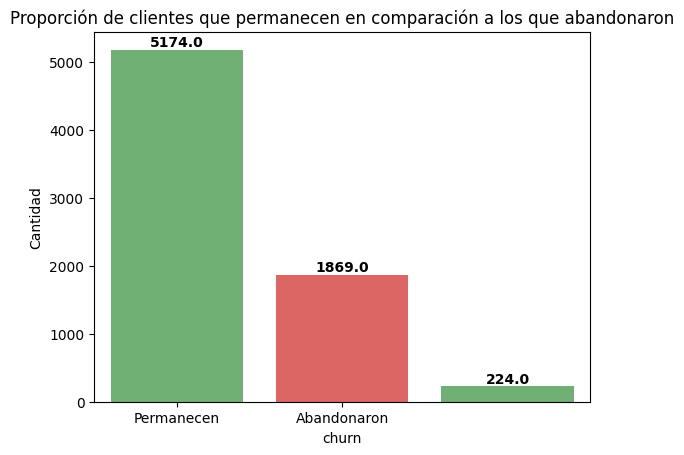

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax =sns.countplot(x='churn', data=datos_totales, palette=['#66bb6a', '#ef5350'])
plt.title('Proporción de clientes que permanecen en comparación a los que abandonaron')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Permanecen', 'Abandonaron'])

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

## **Recuento de evasión por variables categóricas**

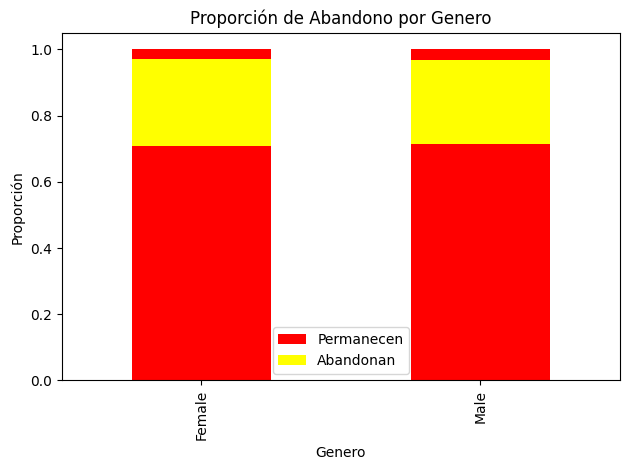

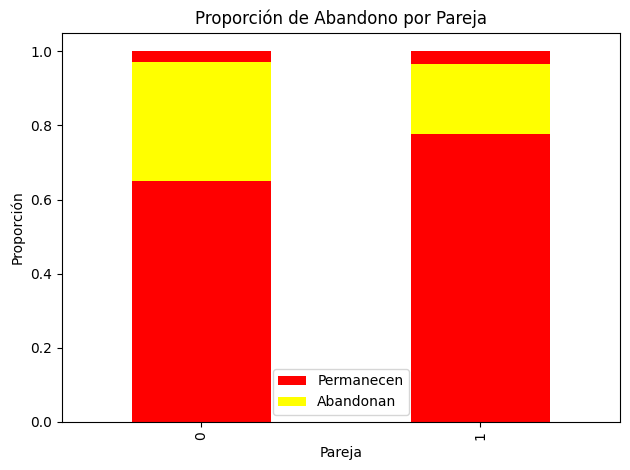

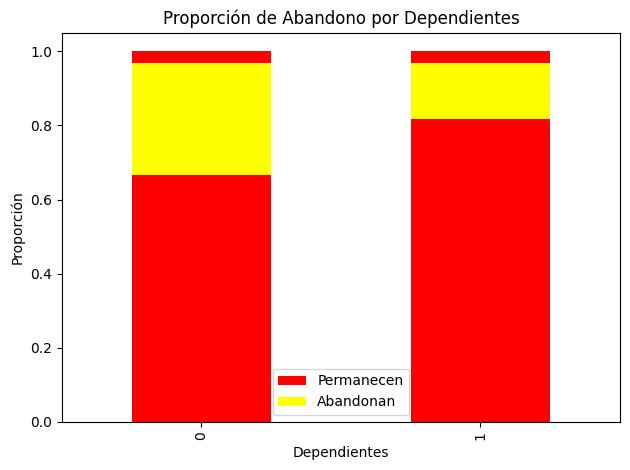

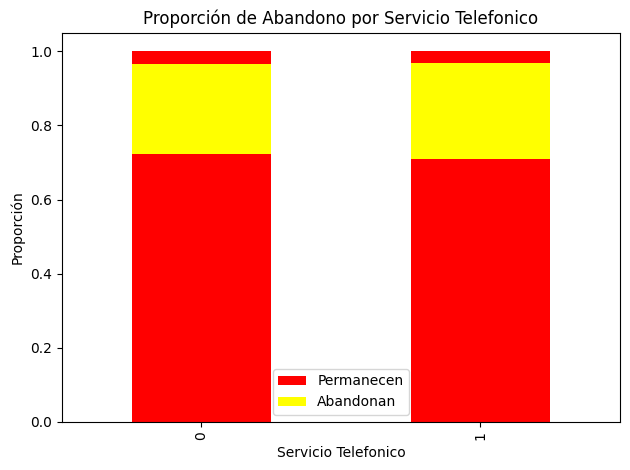

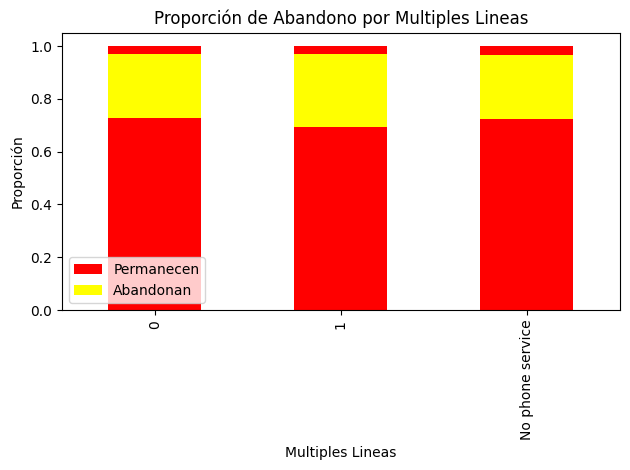

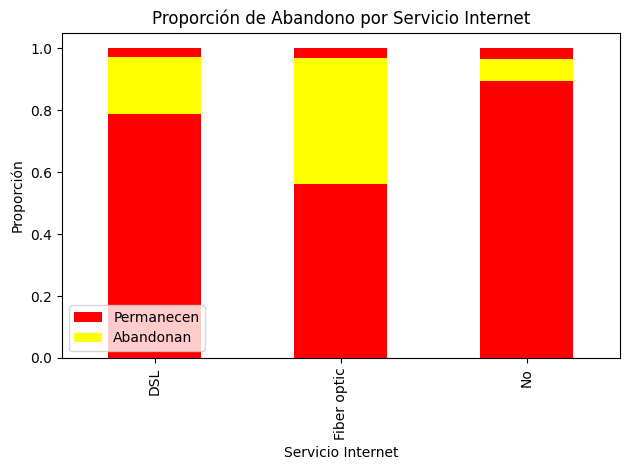

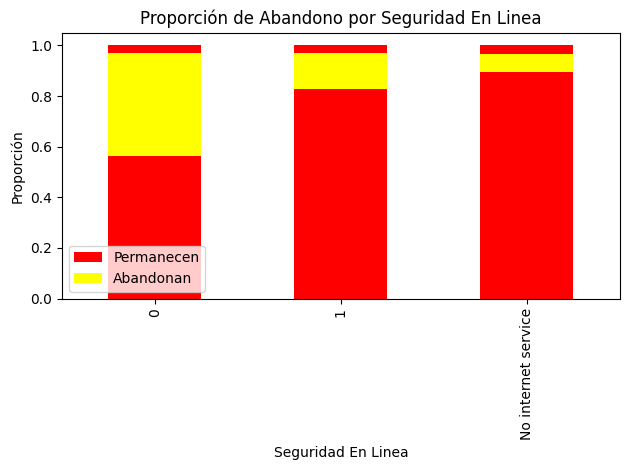

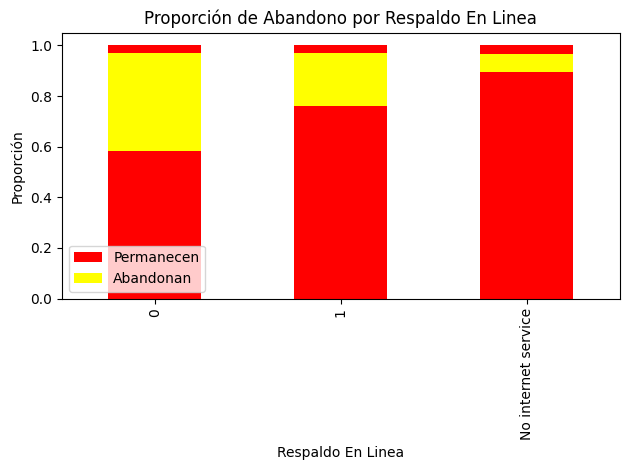

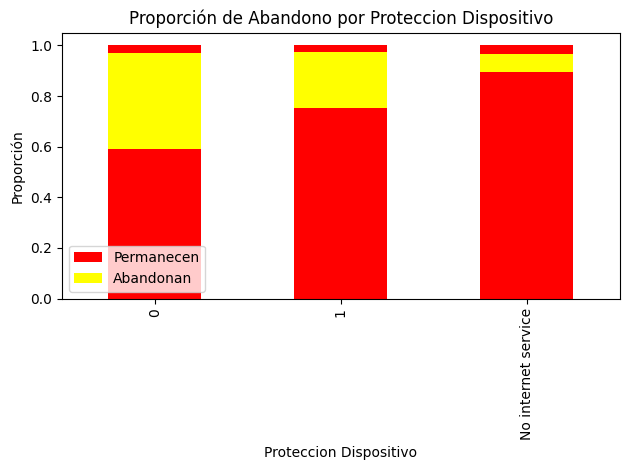

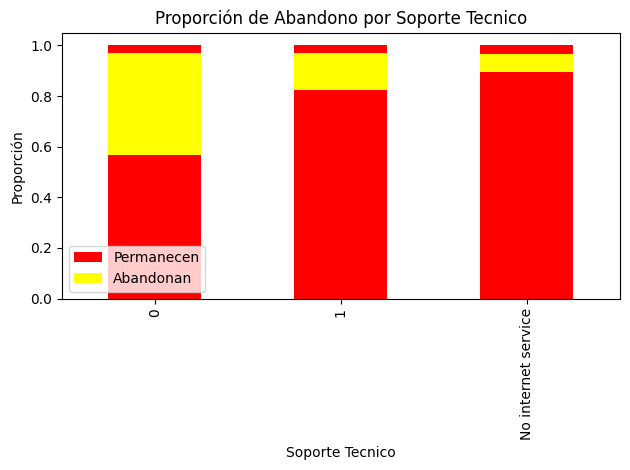

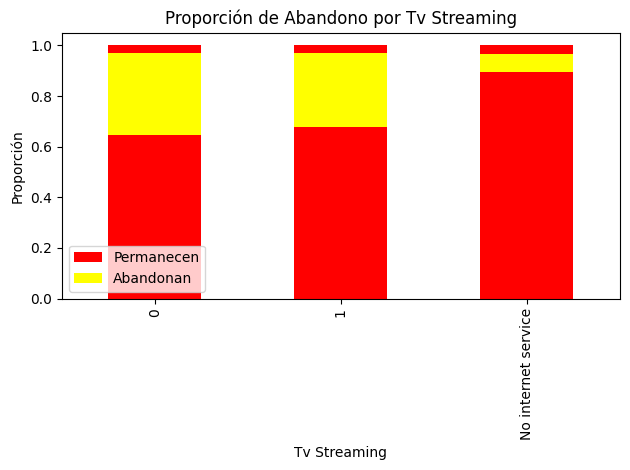

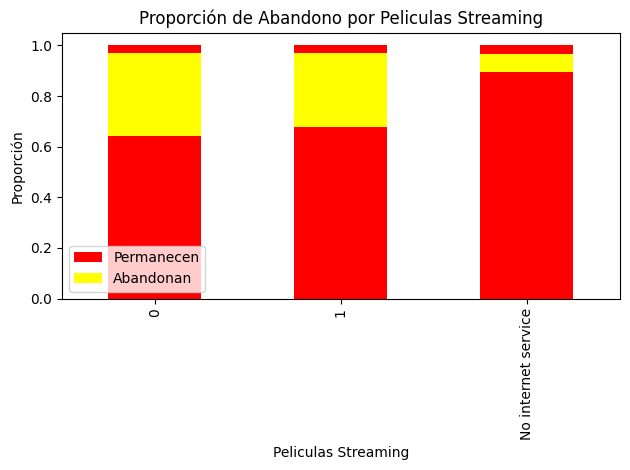

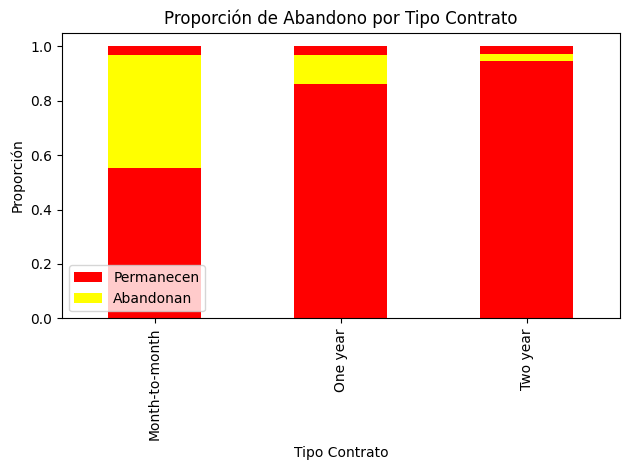

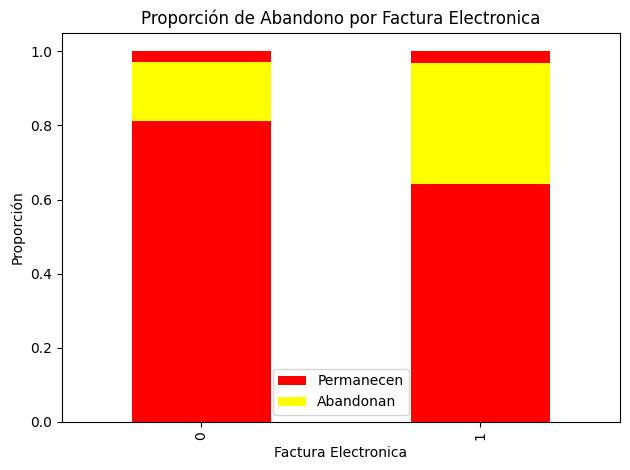

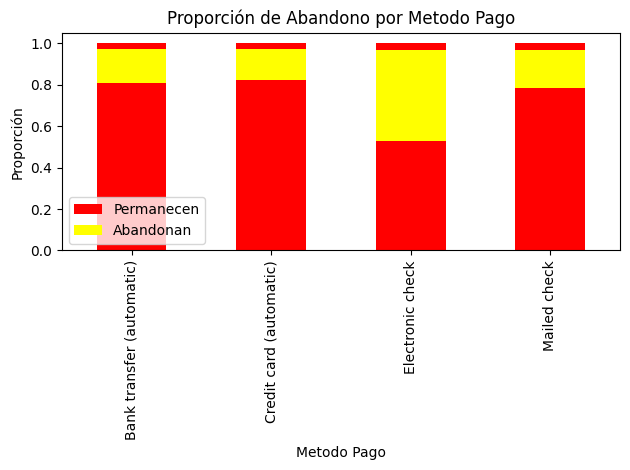

In [ ]:
variables_categoricas = [
    'genero', 'pareja', 'dependientes', 'servicio_telefonico',
    'multiples_lineas', 'servicio_internet', 'seguridad_en_linea',
    'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
    'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
    'factura_electronica', 'metodo_pago'
]

for col in variables_categoricas:
    datos_totales.groupby(col)['churn'].value_counts(normalize=True).unstack().plot(
        kind='bar', stacked=True, color=['red', 'yellow']
    )
    plt.title(f'Proporción de Abandono por {col.replace("_", " ").title()}')
    plt.ylabel('Proporción')
    plt.xlabel(col.replace("_", " ").title())
    plt.legend(['Permanecen', 'Abandonan'])
    plt.tight_layout()
    plt.show()

In [ ]:
datos_totales.sample(6)

,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_internet,seguridad_en_linea,respaldo_en_linea,...,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,servicio_telefonico,multiples_lineas,Cuentas.diarias
3019,4193-IBKSW,0,Male,0,1,1,72,No,No internet service,No internet service,...,No internet service,No internet service,Two year,0,Bank transfer (automatic),24.75,1769.60,1,1,0.825000
6395,8780-IXSTS,1,Female,0,0,0,6,Fiber optic,0,1,...,1,0,Month-to-month,1,Electronic check,90.10,521.30,1,1,3.003333
6954,9576-SYUHJ,0,Male,0,0,0,37,Fiber optic,1,0,...,1,0,Month-to-month,1,Electronic check,91.15,3369.25,1,1,3.038333
3229,4510-HIMLV,1,Male,0,0,0,1,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,69.80,69.80,1,0,2.326667
4940,6741-EGCBI,0,Male,1,0,0,30,Fiber optic,1,0,...,0,1,Month-to-month,1,Credit card (automatic),90.50,2595.85,1,1,3.016667
3728,5136-KCKGI,1,Female,0,1,1,33,Fiber optic,1,0,...,1,1,One year,1,Mailed check,103.70,3467.00,1,1,3.456667


In [42]:
chu = datos_totales['churn']
chu

,churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [43]:
tiempo = datos_totales['meses_contrato']
tiempo

,meses_contrato
0,9
1,9
2,4
3,13
4,3
...,...
7262,13
7263,22
7264,2
7265,67


In [44]:
gasto = datos_totales['cargo_total']
gasto

,cargo_total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [45]:
val_numericas = pd.concat([chu,tiempo,gasto], axis=1)
val_numericas

,churn,meses_contrato,cargo_total
0,0,9,593.30
1,0,9,542.40
2,1,4,280.85
3,1,13,1237.85
4,1,3,267.40
...,...,...,...
7262,0,13,742.90
7263,1,22,1873.70
7264,0,2,92.75
7265,0,67,4627.65


In [52]:
val_numericas['churn'] = pd.to_numeric(val_numericas['churn'], errors='coerce')
val_numericas['meses_contrato'] = pd.to_numeric(val_numericas['meses_contrato'], errors='coerce')
val_numericas['cargo_total'] = pd.to_numeric(val_numericas['cargo_total'], errors='coerce')

In [53]:
churn_1 = val_numericas[val_numericas['churn'] == 1]
churn_0 = val_numericas[val_numericas['churn'] == 0]

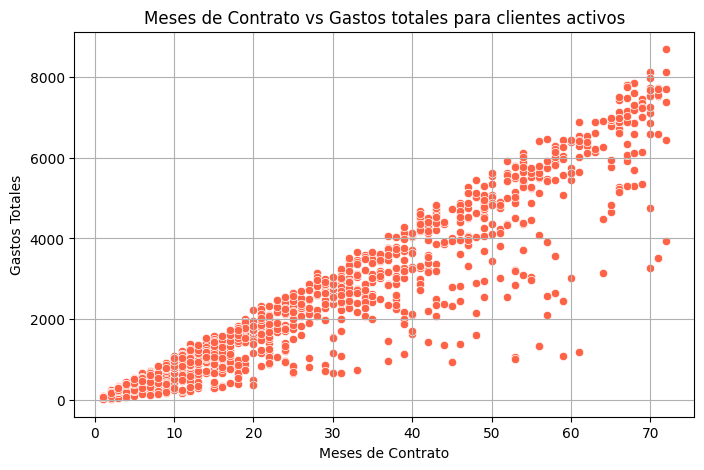

In [56]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='meses_contrato', y='cargo_total', data=churn_1, color='tomato')
plt.title('Meses de Contrato vs Gastos totales para clientes activos')
plt.xlabel('Meses de Contrato')
plt.ylabel('Gastos Totales')
plt.grid(True)
plt.show()

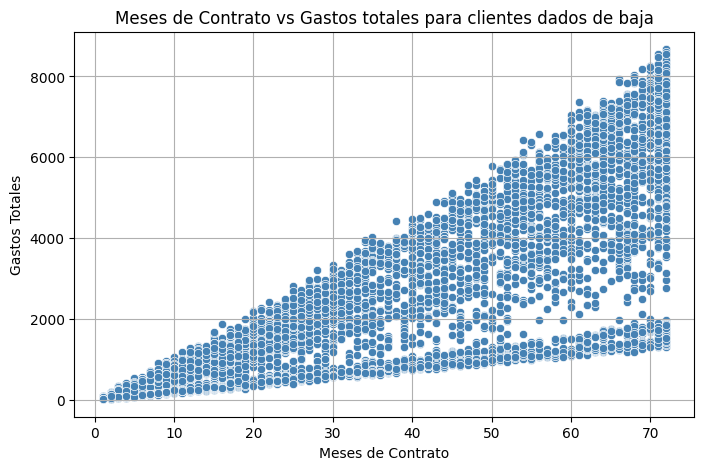

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='meses_contrato', y='cargo_total', data=churn_0, color='steelblue')
plt.title('Meses de Contrato vs Gastos totales para clientes dados de baja')
plt.xlabel('Meses de Contrato')
plt.ylabel('Gastos Totales')
plt.grid(True)
plt.show()

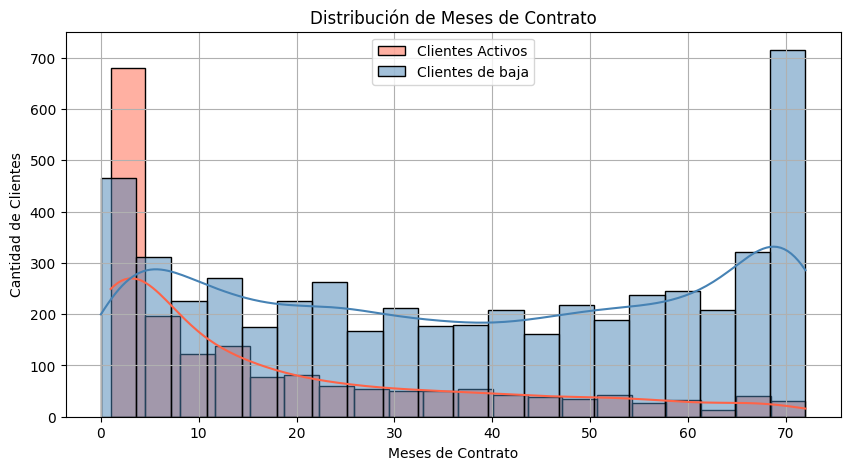

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(churn_1['meses_contrato'], color='tomato', label='Clientes Activos', kde=True, bins=20)
sns.histplot(churn_0['meses_contrato'], color='steelblue', label='Clientes de baja', kde=True, bins=20)
plt.title('Distribución de Meses de Contrato')
plt.xlabel('Meses de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend()
plt.grid(True)
plt.show()

#📄Informe final

Podemos decir en base a los graficos analizados que existe una cantidad de clientes dados de baja a tener en cuenta de 1869 sobre 7043 clientes.
Si bien las razones pueden variar la mayoria de estas se dan por diversas rezones como servicio de internet, tecnico, forma de pago o tiempos de contrato.
Sugiero promociones que hagan que los clientes tengan contratos mas largos como tambien sumatoria de promos en base a diversos pagos ya que las acreditaciones como por ejemplo "debito automatico" tienden menos a ser dadas de baja que como por ejemplos facturas mensuales pagadas de formas manual.